# CS 457 - Homework Assignment 10: Clustering
## Ali Hashir
### ah05433@st.habib.edu.pk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('McDonaldsMenu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Part 1,2 - Cleaning Data

In [3]:
X = df.drop(['Category','Item','Serving Size'],axis=1)

In [4]:
X.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


### Part 3 - Scaling (Normalization)

In [5]:
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS[1:5]

array([[0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.49479167, 0.23888889,
        0.24      , 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.24137931, 0.08823529, 0.        , 0.42857143,
        0.375     ],
       [0.21276596, 0.19811321, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.08695652, 0.0833333

### Part 4 - Optimal number of clusters

In [6]:
#Finding the optimum number of clusters for k-means clustering
wss = []
silhouette_score_avg = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 50)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)
    
    silhouette_score_avg.append(silhouette_score(XS, kmeans.labels_))

c:\Users\ali_h\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali_h\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali_h\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ali_h\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

### Elbow Plot

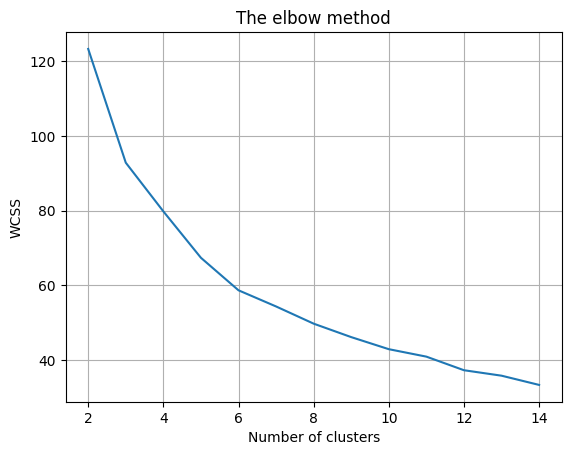

In [7]:
plt.plot(range(2, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.grid()
plt.show()

#### From the above visualization, after k=3, the plot becomes less drastically changing and more flatter. It is a significant change in WCSS so the optimal number of clusters that we can use for the k-means clustering is 3. 

### Silhoutte Average Score Plot

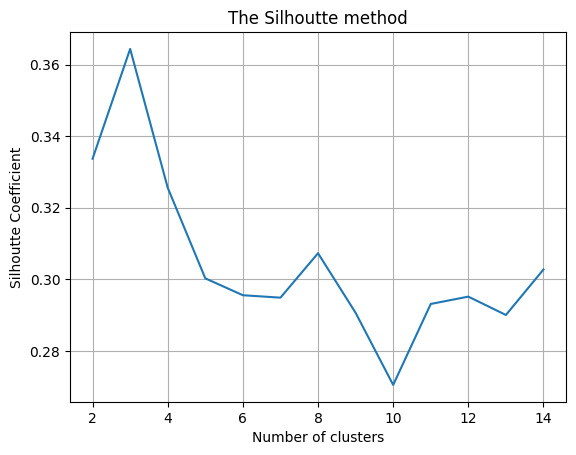

In [8]:
plt.plot(range(2, 15), silhouette_score_avg)
plt.title('The Silhoutte method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient') #within cluster sum of squares
plt.grid()
plt.show()

#### The Silhoutte Average Plot also confirms the number of clusters to be 3 (as found out by the Elbow Plot) as the Silhoutte Coefficient has the value most closest to 1 at number of clusters = 3. So we will take k = 3.

### Part 5 - K-Means Clustering (with optimal no. of clusters)

In [9]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)

c:\Users\ali_h\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
Y

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### Part 6 - Clustering Visualization

Text(0.5, 1.0, 'The actual dataset')

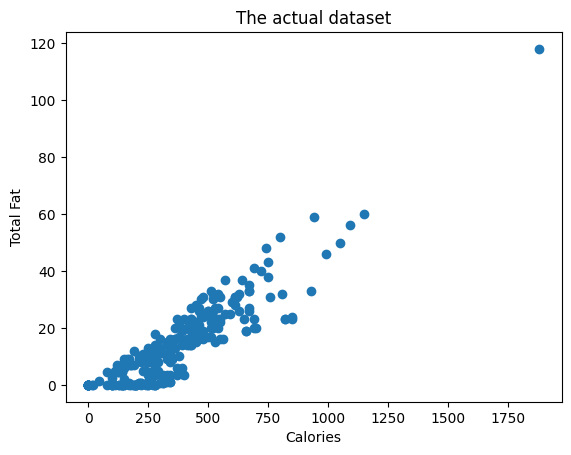

In [11]:
plt.scatter(x=X['Calories'],y=X['Total Fat'])
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("The actual dataset")

Text(0.5, 1.0, 'The post-clustering dataset')

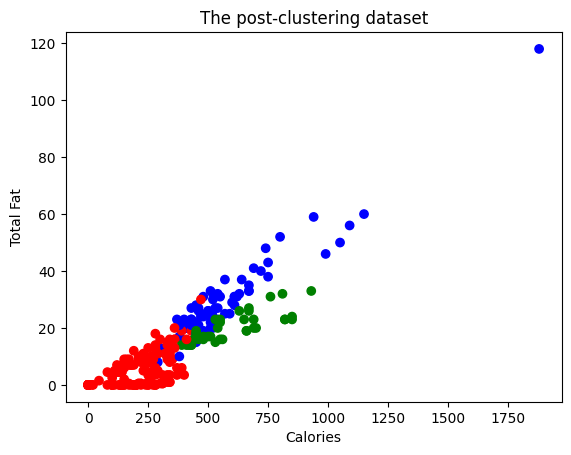

In [12]:
#After the clustering
#adding the colors
color2=np.array(['green','red','blue'])
plt.scatter(x=X['Calories'],y=X['Total Fat'],c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("The post-clustering dataset")

### Another Visual (with centroids)

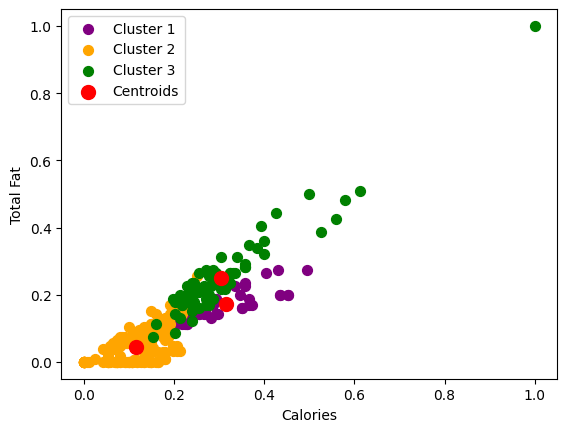

In [13]:
#Visualising the clusters
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.legend()

### Part 7 - Assigning Cluster Labels

In [14]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]

### Part 8 - Insights

#### Assuming clusters are of food items on the menu. 

In [15]:
calories = []
calories.append(C1['Calories'].mean())
calories.append(C2['Calories'].mean())
calories.append(C3['Calories'].mean())
calories

[593.2432432432432, 216.35761589403972, 571.25]

#### The average calories of each cluster is shown above. According to the means, cluster 1 and cluster 3 both have high caloric food items, with cluster 1 having the highest among all, i.e. 593.243 on average. Cluster 2 has the items with the lowest calories. 

In [16]:
sugars = []
sugars.append(C1['Sugars'].mean())
sugars.append(C2['Sugars'].mean())
sugars.append(C3['Sugars'].mean())
sugars

[78.37837837837837, 27.5364238410596, 8.222222222222221]

#### Cluster 1 has the highest content of Sugars, i.e. 78.38 is the average amount of sugar in cluster 1, then cluster 2, and at last, cluster 3 has the lowest sugars (8.22). From this we can see that the items in cluster 1 may include desserts since it has the highest sugar content. 

In [17]:
protein = []
protein.append(C1['Protein'].mean())
protein.append(C2['Protein'].mean())
protein.append(C3['Protein'].mean())
protein

[13.486486486486486, 7.086092715231788, 26.375]

#### Cluster 3 has the items with highest proteins, 26.375 on average. This means that the items in cluster 3 may have animal products, i.e. meat-based. Because meats are high in protein so this cluster has highest protein items. 

### Overall cluster descriptions

In [18]:
C1.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000
mean,593.243243,181.621622,20.216216,31.081081,12.378378,61.729730,0.770270,64.189189,21.405405,220.135135,...,89.972973,29.945946,0.891892,3.918919,78.378378,13.486486,19.054054,0.0,44.324324,4.405405
std,149.463003,47.755949,5.218211,8.101366,3.311188,16.992888,0.401293,18.047527,5.856902,68.814227,...,26.349664,8.787447,0.698561,2.994239,21.727289,3.556072,5.507298,0.0,12.481217,3.692782
min,390.000000,120.000000,14.000000,21.000000,8.000000,39.000000,0.000000,35.000000,11.000000,120.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,460.000000,150.000000,16.000000,25.000000,10.000000,49.000000,0.500000,50.000000,17.000000,180.000000,...,65.000000,22.000000,0.000000,0.000000,59.000000,11.000000,15.000000,0.0,35.000000,2.000000
50%,550.000000,170.000000,19.000000,29.000000,12.000000,60.000000,1.000000,60.000000,21.000000,210.000000,...,86.000000,29.000000,1.000000,4.000000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,690.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,260.000000,...,109.000000,36.000000,1.000000,6.000000,93.000000,15.000000,20.000000,0.0,50.000000,8.000000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,400.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


In [19]:
C2.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,216.357616,47.384106,5.324503,8.185430,2.423841,11.966887,0.003311,16.887417,5.761589,183.708609,...,35.576159,11.86755,1.019868,4.000000,27.536424,7.086093,9.529801,10.125828,16.556291,3.092715
std,114.587570,51.613417,5.748101,8.776031,2.521738,12.339323,0.040689,18.227650,6.160853,226.476241,...,20.632478,6.90186,1.202609,4.753946,21.936507,6.403062,21.610741,33.400460,16.630749,4.325661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,...,21.500000,7.00000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,240.000000,35.000000,4.000000,6.000000,2.000000,10.000000,0.000000,10.000000,3.000000,125.000000,...,38.000000,13.00000,1.000000,3.000000,27.000000,7.000000,4.000000,0.000000,10.000000,2.000000
75%,300.000000,80.000000,9.000000,14.000000,4.500000,22.000000,0.000000,30.000000,9.500000,180.000000,...,50.000000,17.00000,1.000000,6.000000,45.000000,12.000000,10.000000,2.000000,30.000000,6.000000
max,470.000000,270.000000,30.000000,45.000000,8.000000,39.000000,0.500000,115.000000,38.000000,990.000000,...,79.000000,26.00000,6.000000,23.000000,76.000000,29.000000,170.000000,240.000000,60.000000,20.000000


In [20]:
C3.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,571.250000,266.250000,29.597222,45.638889,10.250000,51.388889,0.333333,130.000000,43.333333,1291.805556,...,50.125000,16.708333,3.291667,13.180556,8.222222,26.375000,18.708333,9.583333,18.236111,19.180556
std,232.996025,134.786608,15.025480,23.147601,4.195907,20.986619,0.562940,134.452463,44.887339,463.180452,...,20.271355,6.772849,1.336777,5.549588,5.672325,11.301798,32.964957,11.428590,7.755948,6.832661
min,290.000000,80.000000,8.000000,13.000000,2.500000,13.000000,0.000000,0.000000,0.000000,290.000000,...,22.000000,7.000000,2.000000,6.000000,0.000000,6.000000,0.000000,0.000000,2.000000,8.000000
25%,447.500000,197.500000,22.000000,33.000000,7.750000,39.000000,0.000000,50.000000,16.750000,1030.000000,...,38.750000,13.000000,2.000000,9.000000,3.000000,20.000000,4.000000,2.000000,15.000000,15.000000
50%,510.000000,235.000000,26.000000,40.000000,10.000000,48.000000,0.000000,80.000000,27.000000,1260.000000,...,45.500000,15.000000,3.000000,12.000000,7.000000,25.000000,8.000000,8.000000,20.000000,20.000000
75%,612.500000,290.000000,32.250000,49.250000,13.000000,64.250000,0.500000,141.250000,46.250000,1470.000000,...,56.000000,19.000000,4.000000,15.000000,12.000000,32.000000,15.000000,15.000000,25.000000,20.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,2.500000,575.000000,192.000000,3600.000000,...,118.000000,39.000000,7.000000,28.000000,32.000000,87.000000,170.000000,70.000000,30.000000,40.000000


### Part 9 - Naming Clusters

#### Cluster 1 - High Caloric Items
#### Cluster 2 - Lowest Fat Items
#### Cluster 3 - Meat-based Items